<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Fitbit_V02_Regression_2023_07_10_pre_light_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import seaborn as sns
import sklearn.metrics as sm


def prim_plot(y_actual,y_pred):
  pred_y_df=pd.DataFrame(
      {
          "Actual_Value":y_actual,
          "Predicted_Value":y_pred,
          "Difference":y_actual-y_pred
      }
  )


  """sns.set(rc={'figure.figsize':(12,10)})
  scatter_poly2 = sns.lmplot(
      data = pred_y_df,
      x = "Actual_Value",
      y = "Predicted_Value",
      order = 2
  )"""

  sns.regplot(x="Actual_Value", y="Predicted_Value", data=pred_y_df)


def res(y_actual,y_pred):
  print("Mean absolute error =", round(sm.mean_absolute_error(y_actual, y_pred), 2))
  print("Mean squared error =", round(sm.mean_squared_error(y_actual, y_pred), 2))
  print("Median absolute error =", round(sm.median_absolute_error(y_actual, y_pred), 2))
  print("Explain variance score =", round(sm.explained_variance_score(y_actual, y_pred), 2))
  print("R2 score =", round(sm.r2_score(y_actual, y_pred), 2))


def sub_wise_splt(df,col,flage):
  total_count = len(set(df[col]))
  subjects=sorted(set(df[col]))

  train_axis = []
  test_axis = []

  count = 0

  if str(df[col].dtypes)=='object':
    for i in subjects:
      if count <= flage:
        train_axis.append(df.query(col+" == '"+i+"'"))
      else:
        test_axis.append(df.query(col+" == '"+i+"'"))
      count+=1
  else:
    for i in subjects:
      if count <= flage:
        train_axis.append(df.query(col+" == "+str(i)))
      else:
        test_axis.append(df.query(col+" == "+str(i)))
      count+=1


  return pd.concat(train_axis, axis=0).reset_index(drop = True),pd.concat(test_axis, axis=0).reset_index(drop = True)




from sklearn.preprocessing import LabelEncoder


def encode(data):
  cls = list(data)
  encoder=LabelEncoder()
  for i in cls:
    if str(data[i].dtypes) == 'object':
      data[i]=encoder.fit_transform(data[i])

  return data


def drop_str_col(data):
  cls = list(data)
  rmv=[]
  for i in cls:
    if str(data[i].dtypes) == 'object':
      rmv.append(i)
  data = data.drop(rmv, axis=1)
  return data

In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
dataset=pd.read_csv("/content/Fitbit_feature_merged_version_2023.06.20 - Main file.csv")
#dataset = pd.read_csv("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Feature Matrix/Fitbit_feature_merged_version_2023.06.20 - Main file.csv")
#dataset=pd.read_excel("/content/drive/MyDrive/Cornell/MADE Lab/Wearable Project/Data/Fitbit ML/Feature merge/Fitbit_feature_merged_version_2023.06.29_SPO2_wo_missing column.xlsx")


<ipython-input-42-810674f71f52>:4: DtypeWarning: Columns (133,157,158,232,304,305,310,311,312,317,318,323,324,325,330,331,336,337,338,343,344,349,350,351,356,357,365,371,375,379,381,382,383,384,404,420,433,435,437,439,441,443,449,453) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv("/content/Fitbit_feature_merged_version_2023.06.20 - Main file.csv")


In [ ]:
#dataset[~dataset.isnull().any(axis=1)] # all rows containing non null values

In [ ]:
#dataset['Distance Walked:'].isnull().sum()

51

In [4]:
dataset.shape

(8224, 458)

In [ ]:
"""dataset = dataset.dropna(axis=1,how='all') #column elemination
dataset = dataset.reset_index(drop=True)"""

In [ ]:
"""dataset.dropna(axis=0, how='any', inplace = True) #row elemination
dataset = dataset.reset_index(drop=True)"""

**<font color='coral'>Adding VO2_Max_6MWT</font>**

In [43]:
target = "VO2_Max_6MWT"

gender_dict = {"M":1,"F":2}
loc = dataset.columns.get_loc("5_min_HR_Recovery(stdev)") + 1
dataset.insert(loc,"VO2_Max_6MWT",np.nan)
for i in range(dataset.shape[0]):
  dataset["VO2_Max_6MWT"][i] =59.44 - 3.83 * gender_dict[dataset['Gender'][i]] - 0.56*(dataset["Age (years): "][i]+(dataset["Age (months): "][i])/12) - 0.48 * dataset["Body Mass Index:"][i] + 0.04*0.3048*dataset["Distance Walked:"][i]

<ipython-input-43-eade395522f2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["VO2_Max_6MWT"][i] =59.44 - 3.83 * gender_dict[dataset['Gender'][i]] - 0.56*(dataset["Age (years): "][i]+(dataset["Age (months): "][i])/12) - 0.48 * dataset["Body Mass Index:"][i] + 0.04*0.3048*dataset["Distance Walked:"][i]


In [ ]:
#list(dataset.columns)

**<font color='coral'>New Dataset</font>**

In [44]:
last_index = dataset.columns.get_loc("VO2_Max_6MWT")+1

dataset = dataset.iloc[:,:last_index]

In [58]:
dataset = dataset.dropna(axis=1,how='all') #column elemination
dataset = dataset.reset_index(drop=True)

In [59]:
dataset.columns[dataset.isnull().any()].tolist()

['dfa_alpha1', 'dfa_alpha2', 'VO2_Max_6MWT']

In [57]:
np.where(dataset["lomb_ma"].isna())[0]

array([   0,    1,    2, ..., 8221, 8222, 8223])

In [61]:
dataset.shape

(8224, 121)

In [46]:
dataset.shape

(8224, 124)

In [ ]:
import statistics as st

def find_stat_classwise(dataframe,col,target_col,temp_tar,stat_type='mean'):
  print("Calculating-",col,"|| Target-",temp_tar)
  list_1 = []
  for row in range(dataframe.shape[0]):
      if str(dataframe[col][row]) != 'nan' and str(dataframe[target_col][row]) == temp_tar:
        list_1.append(dataframe[col][row])

  try:
    if stat_type == 'median':
      return st.median(list_1)
    elif stat_type == 'mean':
      return st.mean(list_1)
    elif stat_type == 'mode':
      return st.mode(list_1)

  except:
    print("No Class exist")
    return 'nan'



---



---



#Split Dataset into pre and post

In [ ]:
pre_dataset = dataset.query("Condition == 'pre' and Activity == 'Light'").reset_index(drop=True)
post_dataset = dataset.query("Condition == 'post' and Activity == 'Light'").reset_index(drop=True)


In [ ]:
pre_dataset.head(10)

,Subject,Condition,Activity,Epoch Duration(min),Epoch,nni_counter,nni_mean,nni_min,nni_max,hr_mean,...,Please check any AIDS OR DEVICES that you usually use for any of these activities: (choice=Long-handled appliances in bathroom).1,Please check any AIDS OR DEVICES that you usually use for any of these activities: (choice=Other).1,Please check any categories for which usually need HELP FROM ANOTHER PERSON: (choice=Hygiene).1,Please check any categories for which usually need HELP FROM ANOTHER PERSON: (choice=Reach).1,Please check any categories for which usually need HELP FROM ANOTHER PERSON: (choice=Gripping and opening things).1,Please check any categories for which usually need HELP FROM ANOTHER PERSON: (choice=Errands and chores).1,Complete?,Has this CRF been quality checked,Date CRF was last checked:,Complete?.1
0,002-JR,pre,Light,10,1,65,779.015385,740.0,810.0,77.047607,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
1,002-JR,pre,Light,10,10,65,703.938462,666.0,740.0,85.275756,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
2,002-JR,pre,Light,10,11,61,789.459016,750.0,845.0,76.033174,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
3,002-JR,pre,Light,10,12,66,774.393939,731.0,833.0,77.537793,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
4,002-JR,pre,Light,10,13,77,762.038961,697.0,821.0,78.878037,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
5,002-JR,pre,Light,10,14,72,688.861111,652.0,731.0,87.146588,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
6,002-JR,pre,Light,10,15,72,735.500000,697.0,800.0,81.660141,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
7,002-JR,pre,Light,10,16,66,743.106061,681.0,789.0,80.820900,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
8,002-JR,pre,Light,10,17,72,642.000000,612.0,674.0,93.517353,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
9,002-JR,pre,Light,10,18,72,655.638889,582.0,697.0,91.598758,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete


In [ ]:
post_dataset.head(10)

,Subject,Condition,Activity,Epoch Duration(min),Epoch,nni_counter,nni_mean,nni_min,nni_max,hr_mean,...,Please check any AIDS OR DEVICES that you usually use for any of these activities: (choice=Long-handled appliances in bathroom).1,Please check any AIDS OR DEVICES that you usually use for any of these activities: (choice=Other).1,Please check any categories for which usually need HELP FROM ANOTHER PERSON: (choice=Hygiene).1,Please check any categories for which usually need HELP FROM ANOTHER PERSON: (choice=Reach).1,Please check any categories for which usually need HELP FROM ANOTHER PERSON: (choice=Gripping and opening things).1,Please check any categories for which usually need HELP FROM ANOTHER PERSON: (choice=Errands and chores).1,Complete?,Has this CRF been quality checked,Date CRF was last checked:,Complete?.1
0,002-JR,post,Light,10,1,69,762.275362,731.0,810.0,78.784007,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
1,002-JR,post,Light,10,10,64,752.296875,722.0,789.0,79.788063,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
2,002-JR,post,Light,10,100,73,687.876712,638.0,740.0,87.334350,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
3,002-JR,post,Light,10,101,78,585.282051,545.0,645.0,102.611992,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
4,002-JR,post,Light,10,102,66,603.772727,582.0,645.0,99.417782,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
5,002-JR,post,Light,10,103,87,607.206897,555.0,740.0,99.222786,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
6,002-JR,post,Light,10,104,69,673.130435,638.0,740.0,89.201360,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
7,002-JR,post,Light,10,105,65,653.092308,625.0,722.0,92.003173,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
8,002-JR,post,Light,10,106,72,613.986111,576.0,674.0,97.842853,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
9,002-JR,post,Light,10,107,75,632.466667,600.0,714.0,94.975528,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete


In [ ]:
dataset = pre_dataset

In [ ]:
dataset

,Subject,Condition,Activity,Epoch Duration(min),Epoch,nni_counter,nni_mean,nni_min,nni_max,hr_mean,...,Please check any AIDS OR DEVICES that you usually use for any of these activities: (choice=Long-handled appliances in bathroom).1,Please check any AIDS OR DEVICES that you usually use for any of these activities: (choice=Other).1,Please check any categories for which usually need HELP FROM ANOTHER PERSON: (choice=Hygiene).1,Please check any categories for which usually need HELP FROM ANOTHER PERSON: (choice=Reach).1,Please check any categories for which usually need HELP FROM ANOTHER PERSON: (choice=Gripping and opening things).1,Please check any categories for which usually need HELP FROM ANOTHER PERSON: (choice=Errands and chores).1,Complete?,Has this CRF been quality checked,Date CRF was last checked:,Complete?.1
0,002-JR,pre,Light,10,1,65,779.015385,740.0,810.0,77.047607,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
1,002-JR,pre,Light,10,10,65,703.938462,666.0,740.0,85.275756,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
2,002-JR,pre,Light,10,11,61,789.459016,750.0,845.0,76.033174,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
3,002-JR,pre,Light,10,12,66,774.393939,731.0,833.0,77.537793,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
4,002-JR,pre,Light,10,13,77,762.038961,697.0,821.0,78.878037,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Checked,Complete,Yes,2023-05-15 00:00:00,Complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,038-JS,pre,Light,10,69,63,772.936508,740.0,833.0,77.703360,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Complete,Yes,2023-05-26 00:00:00,Complete
2284,038-JS,pre,Light,10,7,74,680.418919,638.0,714.0,88.245339,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Complete,Yes,2023-05-26 00:00:00,Complete
2285,038-JS,pre,Light,10,70,64,754.343750,731.0,800.0,79.572614,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Complete,Yes,2023-05-26 00:00:00,Complete
2286,038-JS,pre,Light,10,8,73,709.109589,594.0,750.0,84.810075,...,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Unchecked,Complete,Yes,2023-05-26 00:00:00,Complete




---


Encoding all str/obj columns

In [ ]:
dataset = encode(dataset)

In [ ]:
dataset.dtypes

Subject                                                                                                       int64
Condition                                                                                                     int64
Activity                                                                                                      int64
Epoch Duration(min)                                                                                           int64
Epoch                                                                                                         int64
                                                                                                              ...  
Please check any categories for which usually need HELP FROM ANOTHER PERSON: (choice=Errands and chores).1    int64
Complete?                                                                                                     int64
Has this CRF been quality checked                                       

Deleting all str/obj columns

In [ ]:
#dataset = drop_str_col(dataset)



---



#Custom Spliting

In [ ]:
len(set(dataset ["Subject"]))

35

In [ ]:
list(dataset.columns)

['Subject',
 'Condition',
 'Activity',
 'Epoch Duration(min)',
 'Epoch',
 'nni_counter',
 'nni_mean',
 'nni_min',
 'nni_max',
 'hr_mean',
 'hr_min',
 'hr_max',
 'hr_std',
 'nni_diff_mean',
 'nni_diff_min',
 'nni_diff_max',
 'sdnn',
 'rmssd',
 'sdsd',
 'nn50',
 'pnn50',
 'nn20',
 'pnn20',
 'tinn_n',
 'tinn_m',
 'tinn',
 'tri_index',
 'fft_bands_vlf_min',
 'fft_bands_vlf_max',
 'fft_bands_lf_min',
 'fft_bands_lf_max',
 'fft_bands_hf_min',
 'fft_bands_hf_max',
 'fft_peak_low',
 'fft_peak_medium',
 'fft_peak_high',
 'fft_abs_low',
 'fft_abs_medium',
 'fft_abs_high',
 'fft_rel_low',
 'fft_rel_medium',
 'fft_log_low',
 'fft_log_medium',
 'fft_log_high',
 'fft_norm_low',
 'fft_norm_high',
 'fft_ratio',
 'fft_total',
 'fft_nfft',
 'fft_window',
 'fft_resampling_frequency',
 'fft_interpolation',
 'lomb_bands_vlf_min',
 'lomb_bands_vlf_max',
 'lomb_bands_lf_min',
 'lomb_bands_lf_max',
 'lomb_bands_hf_min',
 'lomb_bands_hf_max',
 'lomb_peak_low',
 'lomb_peak_medium',
 'lomb_peak_high',
 'lomb_abs

In [ ]:
num_of_train_sub = 28

train,test = sub_wise_splt(dataset,"Subject", num_of_train_sub)

In [ ]:
train.shape

(1982, 300)

In [ ]:
test.shape

(306, 300)

In [ ]:
target

0       27.148411
1       27.148411
2       27.148411
3       27.148411
4       27.148411
          ...    
8219    14.881733
8220    14.881733
8221    14.881733
8222    14.881733
8223    14.881733
Name: VO2_Max_6MWT, Length: 8224, dtype: object

In [ ]:
list(train.columns)

['Subject',
 'Condition',
 'Activity',
 'Epoch Duration(min)',
 'Epoch',
 'nni_counter',
 'nni_mean',
 'nni_min',
 'nni_max',
 'hr_mean',
 'hr_min',
 'hr_max',
 'hr_std',
 'nni_diff_mean',
 'nni_diff_min',
 'nni_diff_max',
 'sdnn',
 'rmssd',
 'sdsd',
 'nn50',
 'pnn50',
 'nn20',
 'pnn20',
 'tinn_n',
 'tinn_m',
 'tinn',
 'tri_index',
 'fft_bands_vlf_min',
 'fft_bands_vlf_max',
 'fft_bands_lf_min',
 'fft_bands_lf_max',
 'fft_bands_hf_min',
 'fft_bands_hf_max',
 'fft_peak_low',
 'fft_peak_medium',
 'fft_peak_high',
 'fft_abs_low',
 'fft_abs_medium',
 'fft_abs_high',
 'fft_rel_low',
 'fft_rel_medium',
 'fft_log_low',
 'fft_log_medium',
 'fft_log_high',
 'fft_norm_low',
 'fft_norm_high',
 'fft_ratio',
 'fft_total',
 'fft_nfft',
 'fft_window',
 'fft_resampling_frequency',
 'fft_interpolation',
 'lomb_bands_vlf_min',
 'lomb_bands_vlf_max',
 'lomb_bands_lf_min',
 'lomb_bands_lf_max',
 'lomb_bands_hf_min',
 'lomb_bands_hf_max',
 'lomb_peak_low',
 'lomb_peak_medium',
 'lomb_peak_high',
 'lomb_abs

In [ ]:
X_train = train.iloc[:,6:116]
'''
X_train = X_train.loc[:, X_train.columns != "aEE_MAX(kJ/min)"]
'''

y_train = train[target]

X_test = test.iloc[:,6:116]
'''
X_test = X_test.loc[:, X_test.columns != "aEE_MAX(kJ/min)"]
'''
y_test = test[target]

KeyError: ignored



---



---



In [ ]:
X = dataset.iloc[:,6:116]

In [ ]:
X

,nni_mean,nni_min,nni_max,hr_mean,hr_min,hr_max,hr_std,nni_diff_mean,nni_diff_min,nni_diff_max,...,HR_MAX(BPM),aEE_MAX(kJ/min),1_min_HR_Recovery(mean),1_min_HR_Recovery(stdev),2_min_HR_Recovery(mean),2_min_HR_Recovery(stdev),3_min_HR_Recovery(mean),3_min_HR_Recovery(stdev),4_min_HR_Recovery(mean),4_min_HR_Recovery(stdev)
0,779.015385,740.0,810.0,77.047607,74.074074,81.081081,1.459607,6.078125,0,20,...,137,90.72,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
1,703.938462,666.0,740.0,85.275756,81.081081,90.090090,1.890121,7.453125,0,23,...,137,90.72,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
2,789.459016,750.0,845.0,76.033174,71.005917,80.000000,1.557212,5.750000,0,45,...,137,90.72,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
3,774.393939,731.0,833.0,77.537793,72.028812,82.079343,2.133033,9.107692,0,39,...,137,90.72,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
4,762.038961,697.0,821.0,78.878037,73.081608,86.083214,3.387898,10.381579,0,49,...,137,90.72,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432,6.425926,6.462432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,772.936508,740.0,833.0,77.703360,72.028812,81.081081,2.442956,7.225806,0,21,...,136,60.93,3.400000,3.241399,3.400000,3.241399,3.400000,3.241399,3.400000,3.241399
2284,680.418919,638.0,714.0,88.245339,84.033613,94.043887,2.410607,5.958904,0,21,...,136,60.93,3.400000,3.241399,3.400000,3.241399,3.400000,3.241399,3.400000,3.241399
2285,754.343750,731.0,800.0,79.572614,75.000000,82.079343,1.627314,6.904762,0,20,...,136,60.93,3.400000,3.241399,3.400000,3.241399,3.400000,3.241399,3.400000,3.241399
2286,709.109589,594.0,750.0,84.810075,80.000000,101.010101,4.285204,6.361111,0,25,...,136,60.93,3.400000,3.241399,3.400000,3.241399,3.400000,3.241399,3.400000,3.241399


In [ ]:
X = dataset.iloc[:,6:116]
'''
X = X.loc[:, X.columns != "aEE_MAX(kJ/min)"]
'''
y = target

In [ ]:
set(X)

{'1_min_HR_Recovery(mean)',
 '1_min_HR_Recovery(stdev)',
 '2_min_HR_Recovery(mean)',
 '2_min_HR_Recovery(stdev)',
 '3_min_HR_Recovery(mean)',
 '3_min_HR_Recovery(stdev)',
 '4_min_HR_Recovery(mean)',
 '4_min_HR_Recovery(stdev)',
 'HR_MAX(BPM)',
 'aEE_MAX(kJ/min)',
 'ar_abs_high',
 'ar_abs_low',
 'ar_abs_medium',
 'ar_bands_hf_max',
 'ar_bands_hf_min',
 'ar_bands_lf_max',
 'ar_bands_lf_min',
 'ar_bands_vlf_max',
 'ar_bands_vlf_min',
 'ar_interpolation',
 'ar_log_high',
 'ar_log_low',
 'ar_log_medium',
 'ar_nfft',
 'ar_norm_high',
 'ar_norm_low',
 'ar_order',
 'ar_peak_high',
 'ar_peak_low',
 'ar_peak_medium',
 'ar_ratio',
 'ar_rel_high',
 'ar_rel_low',
 'ar_rel_medium',
 'ar_resampling_frequency',
 'ar_total',
 'ellipse_area',
 'fft_abs_high',
 'fft_abs_low',
 'fft_abs_medium',
 'fft_bands_hf_max',
 'fft_bands_hf_min',
 'fft_bands_lf_max',
 'fft_bands_lf_min',
 'fft_bands_vlf_max',
 'fft_bands_vlf_min',
 'fft_interpolation',
 'fft_log_high',
 'fft_log_low',
 'fft_log_medium',
 'fft_nfft'

In [ ]:
set(y)

{'2', '6', 'M', 'O', 'T', 'V', 'W', '_', 'a', 'x'}

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
column_name = 'DASI - VO2 peak score:'
column_index = dataset.columns.get_loc(column_name)
column_index

184

In [ ]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(X,y)


dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']


number_of_feat=int(input("Number Of Best Features: "))


imp=featureScores.nlargest(number_of_feat,'Score')
print(imp)


list_of_feat=[]

for i in range(number_of_feat):
  list_of_feat.append(imp.iloc[:,0:1].values[i][0])


X_new = dataset[list_of_feat]
y_new = dataset.iloc[:, 184]

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [20 41 42 43 65 66 72 74 88 89 90] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Number Of Best Features: 30
                        Specs       Score
98                HR_MAX(BPM)  274.814843
99    1_min_HR_Recovery(mean)   69.435011
101   2_min_HR_Recovery(mean)   69.435011
103   3_min_HR_Recovery(mean)   69.435011
105   4_min_HR_Recovery(mean)   69.435011
107   5_min_HR_Recovery(mean)   69.435011
100  1_min_HR_Recovery(stdev)   49.154516
102  2_min_HR_Recovery(stdev)   49.154516
104  3_min_HR_Recovery(stdev)   49.154516
106  4_min_HR_Recovery(stdev)   49.154516
108  5_min_HR_Recovery(stdev)   49.154516
3                     hr_mean   39.827127
5                      hr_max   32.459055
4                      hr_min   32.140833
0                    nni_mean   31.142446
16                     tinn_n   28.743136
17                     tinn_m   28.198996
1                     nni_min   27.872988
2                     nni_max   23.869743
73             ar_peak_medium   22.383333
75                 ar_abs_low   11.019859
81                 ar_log_low   10.735405
7     

In [ ]:
X_new.shape

(1354, 30)

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)




---



In [ ]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

#Decision Trees

In [ ]:
dtree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=0.003)
dtree.fit(X_train, y_train)

pred_train= dtree.predict(X_train)
print("Trainng Result")
res(y_train,pred_train)

print()

pred_test= dtree.predict(X_test)
print("Trainng Result")
res(y_test,pred_test)

Trainng Result
Mean absolute error = 0.43
Mean squared error = 0.89
Median absolute error = 0.37
Explain variance score = 0.98
R2 score = 0.98

Trainng Result
Mean absolute error = 0.36
Mean squared error = 0.45
Median absolute error = 0.37
Explain variance score = 0.99
R2 score = 0.99


In [ ]:

"""for i in range(1,1000):
  l=i/1000
  print("------------------------------------------------------")
  dtree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=l)
  dtree.fit(X_train, y_train)
  pred_test_tree= dtree.predict(X_test)
  k = r2_score(y_test, pred_test_tree)
  if k>0:
    print(k,l)"""

'for i in range(1,1000):\n  l=i/1000\n  print("------------------------------------------------------")\n  dtree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=l)\n  dtree.fit(X_train, y_train)\n  pred_test_tree= dtree.predict(X_test)\n  k = r2_score(y_test, pred_test_tree)\n  if k>0:\n    print(k,l)'

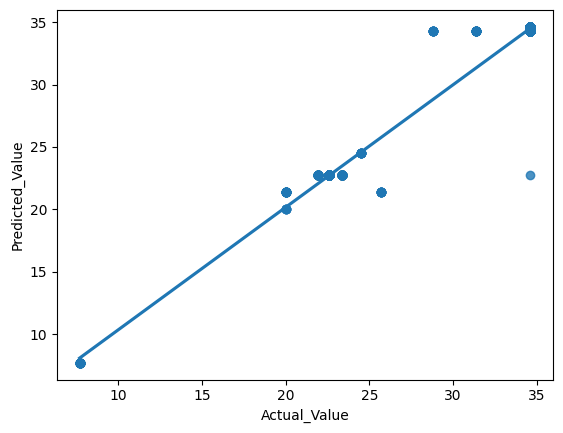

In [ ]:
prim_plot(y_train,pred_train)

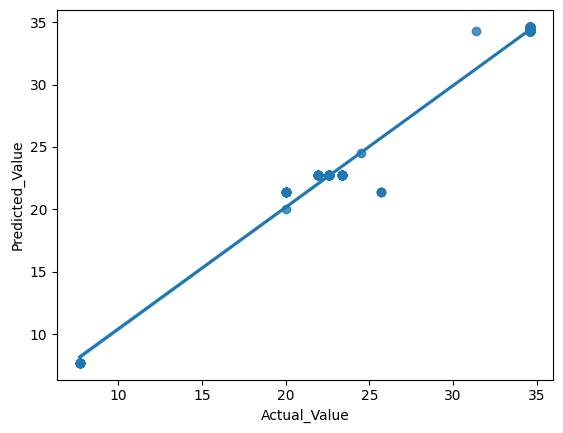

In [ ]:
prim_plot(y_test,pred_test)

#Random Forest (or Bootstrap Aggregation)

In [ ]:
#RF model
model_rf = RandomForestRegressor(n_estimators=700, oob_score=True)
model_rf.fit(X_train, y_train)

print("Training")
pred_train= model_rf.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test = model_rf.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 0.01
Mean squared error = 0.06
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0
Testing
Mean absolute error = 0.01
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0


In [ ]:
"""
for i in range(700,3000,100):
  model_rf = RandomForestRegressor(n_estimators=i, oob_score=True, random_state=100)
  model_rf.fit(X_train, y_train)
  pred_test_rf= model_rf.predict(X_test)
  k = r2_score(y_test, pred_test_rf)
  if k>0:
    print("------------------------------------------------------")
    print(k,i)"""

'\nfor i in range(700,3000,100):\n  model_rf = RandomForestRegressor(n_estimators=i, oob_score=True, random_state=100)\n  model_rf.fit(X_train, y_train)\n  pred_test_rf= model_rf.predict(X_test)\n  k = r2_score(y_test, pred_test_rf)\n  if k>0:\n    print("------------------------------------------------------")\n    print(k,i)'

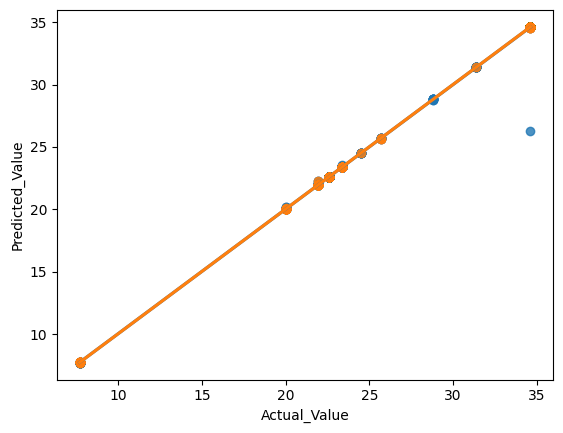

In [ ]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#Polynomial Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)
X_poly_train = poly.fit_transform(X_train)

poly.fit(X_poly_train, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly_train, y_train)





print("Training")
pred_train= lin2.predict(X_poly_train)
res(y_train,pred_train)

print("Testing")
X_poly_test = poly.fit_transform(X_test)
pred_test= lin2.predict(X_poly_test)
res(y_test,pred_test)

Training
Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0
Testing
Mean absolute error = 33.39
Mean squared error = 15503.4
Median absolute error = 6.4
Explain variance score = -286.72
R2 score = -286.98


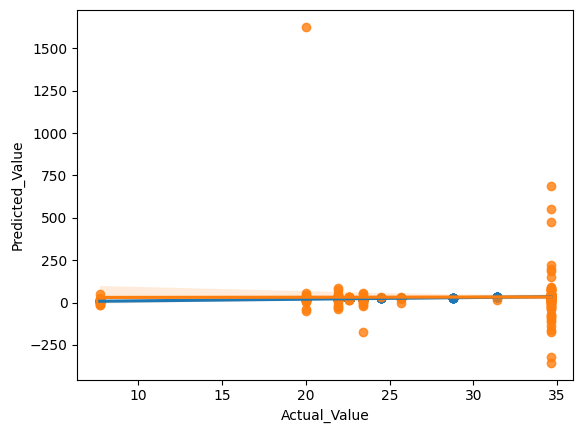

In [ ]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#Kernel Ridge

In [ ]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0)
krr.fit(X_train, y_train)


print("Training")
pred_train= krr.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= krr.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 4.56
Mean squared error = 39.48
Median absolute error = 3.55
Explain variance score = 0.21
R2 score = 0.21
Testing
Mean absolute error = 4.85
Mean squared error = 44.4
Median absolute error = 3.55
Explain variance score = 0.18
R2 score = 0.18


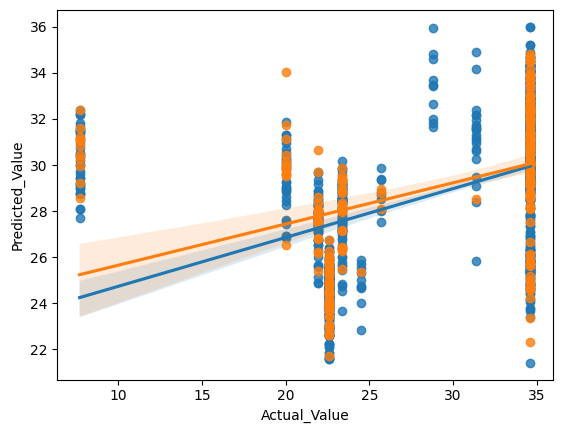

In [ ]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

print("Training")
pred_train= regr.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= regr.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 2.45
Mean squared error = 24.44
Median absolute error = 0.39
Explain variance score = 0.53
R2 score = 0.51
Testing
Mean absolute error = 2.77
Mean squared error = 28.31
Median absolute error = 0.42
Explain variance score = 0.49
R2 score = 0.47


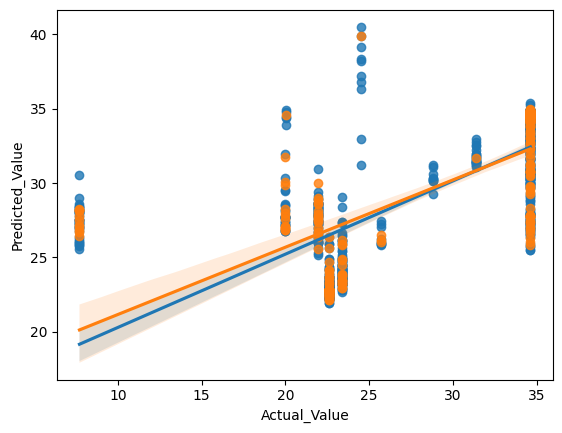

In [ ]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#Lasso

In [ ]:
from sklearn import linear_model
regr = linear_model.Lasso(alpha=0.1)
regr.fit(X_train, y_train)

print("Training")
pred_train= regr.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= regr.predict(X_test)
res(y_test,pred_test)

Training
Mean absolute error = 4.66
Mean squared error = 39.67
Median absolute error = 3.63
Explain variance score = 0.21
R2 score = 0.21
Testing
Mean absolute error = 4.95
Mean squared error = 44.27
Median absolute error = 3.74
Explain variance score = 0.18
R2 score = 0.18


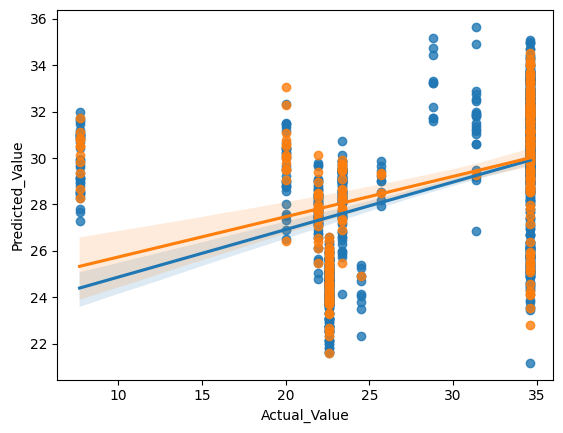

In [ ]:
prim_plot(y_train,pred_train) #[blue]
prim_plot(y_test,pred_test)   #[Yollow]

#ANN Regression

Text(0.5, 1.0, 'ST-II Max-Min Difference')

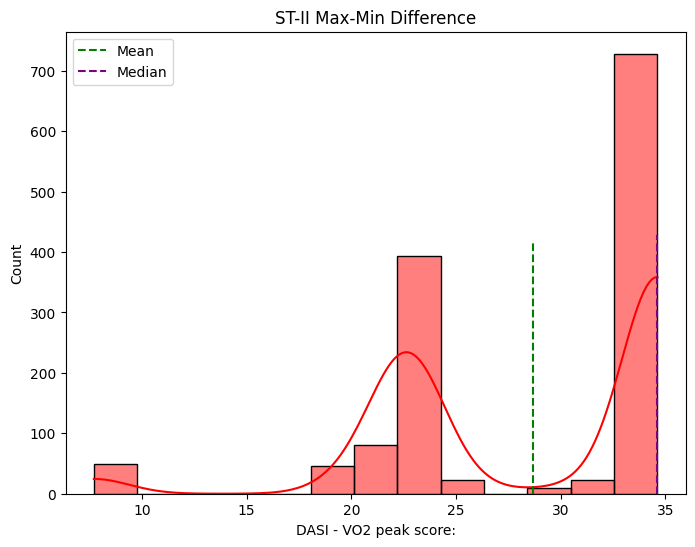

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=dataset,x=target,color="red",kde=True)
plt.axvline(x=dataset[target].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=dataset[target].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("ST-II Max-Min Difference")

Text(0.5, 1.0, 'Cumulative of the Target Column')

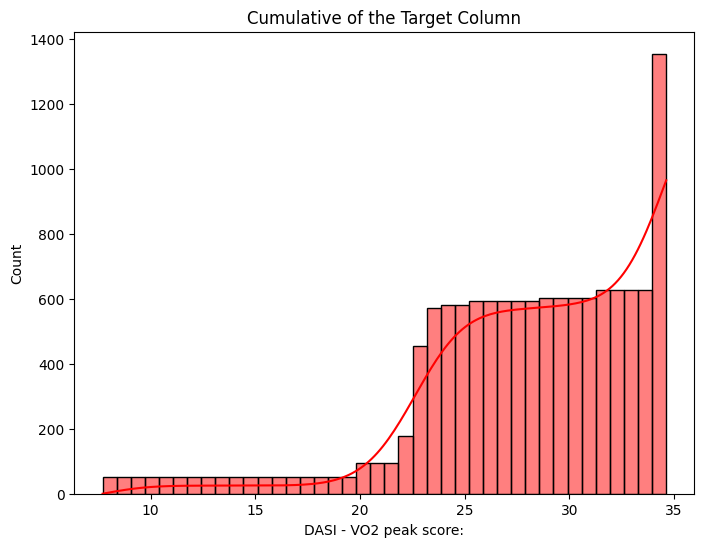

In [ ]:
plt.figure(figsize = (8,6))
sns.histplot(dataset[target],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")

Epoch 1/100
17/17 [==============================] - 1s 16ms/step - loss: 16988462.0000 - val_loss: 13494741.0000
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 11120306.0000 - val_loss: 8714105.0000
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 6842547.5000 - val_loss: 5067394.0000
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 3962442.0000 - val_loss: 2940832.0000
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 2306000.0000 - val_loss: 1712038.3750
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 1418031.8750 - val_loss: 1175586.3750
Epoch 7/100
17/17 [==============================] - 0s 5ms/step - loss: 1010415.9375 - val_loss: 843802.7500
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 722074.0000 - val_loss: 598337.5625
Epoch 9/100
17/17 [==============================] - 0s 5ms/step - loss: 507754.9688 - val_loss: 414860.3125
Ep

<Axes: >

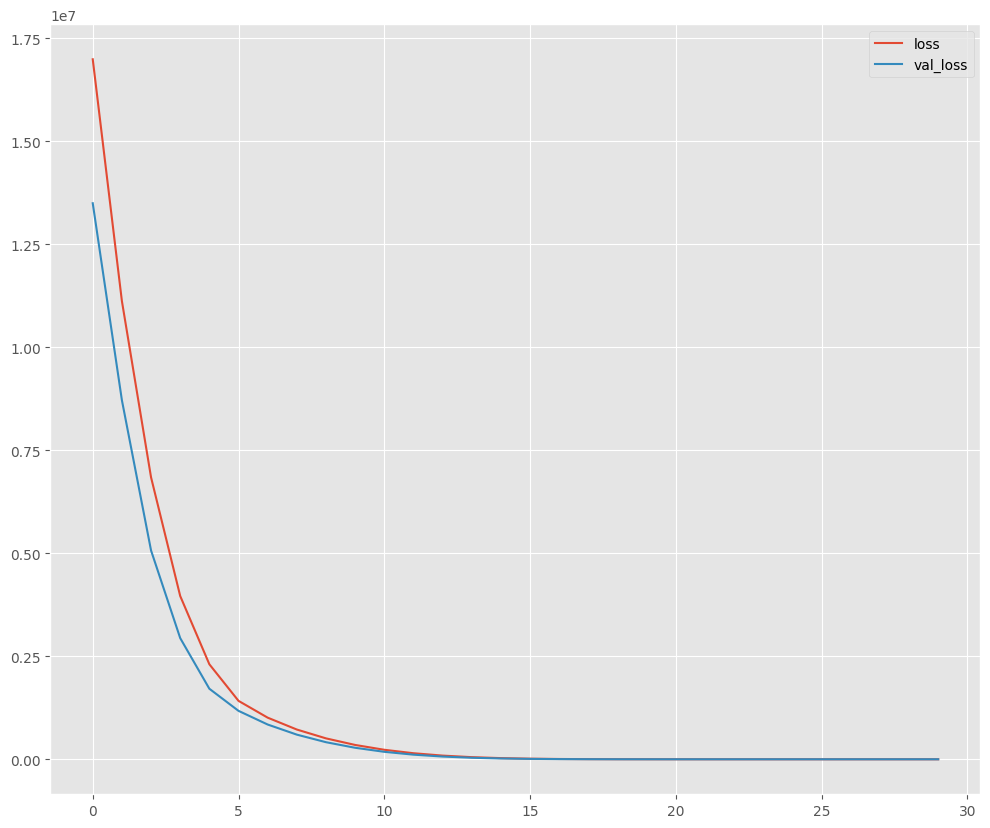

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

ann = Sequential()                          # Initializing the ANN
ann.add(Dense(units=6, activation="relu"))  #Adding First Hidden Layer
ann.add(Dense(units=6, activation="relu"))  # Adding Second Hidden Layer
ann.add(Dense(units=1))   # Adding Output Layer
#If we make a regression with neural networks, we do not need to add an activation function compared to classification problems

ann.compile(optimizer="adam",loss="mean_squared_error")
ann.fit(x=X_train, y=y_train, epochs=100, batch_size=64,validation_data=(X_test,y_test),callbacks=EarlyStopping(monitor='val_loss',patience=4))

#pd.DataFrame(ann.history.history)

plt.style.use("ggplot")
pd.DataFrame(ann.history.history).plot(figsize=(12,10))


In [ ]:
ann.evaluate(X_train,y_train)

34/34 [==============================] - 0s 2ms/step - loss: 275.1886


275.1885681152344

In [ ]:
ann.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 307.3976


307.3975830078125

In [ ]:
predictions = ann.predict(X_test)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(y_test,columns=["Real Values"]), predictions_df],axis=1)
comparison_df

9/9 [==============================] - 0s 3ms/step


,Real Values,Predictions
0,NaN,13.667713
1,NaN,-0.845348
2,NaN,45.733143
3,NaN,35.423573
4,NaN,8.352039
...,...,...
266,NaN,3.329700
267,NaN,30.567616
268,NaN,22.449207
269,NaN,33.864368


Text(0, 0.5, 'Actual Values')

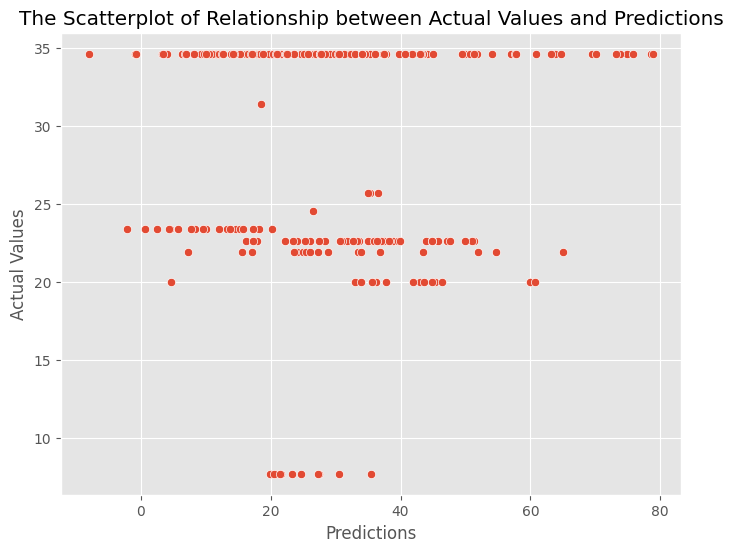

In [ ]:
# here I will visualize the real test values(y_test) versus the predicted values.
plt.figure(figsize=(8,6))
sns.scatterplot(x = np.ravel(predictions),y = y_test)
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
#It seems that our model predicts very well

In [ ]:
print("Training")
pred_train= ann.predict(X_train)
res(y_train,pred_train)

print("Testing")
pred_test= ann.predict(X_test)
res(y_test,pred_test)

Training
34/34 [==============================] - 0s 1ms/step
Mean absolute error = 13.31
Mean squared error = 275.19
Median absolute error = 11.34
Explain variance score = -4.49
R2 score = -4.49
Testing
9/9 [==============================] - 0s 2ms/step
Mean absolute error = 14.27
Mean squared error = 307.4
Median absolute error = 12.96
Explain variance score = -4.7
R2 score = -4.71
